# Loop 73 Analysis: CV-LB Relationship and Strategy Assessment

## Key Questions:
1. What is the current CV-LB relationship?
2. Why did GNN and ChemBERTa fail so badly?
3. What approaches haven't been tried that could break the CV-LB line?
4. What are the top kernels doing that we're not?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Submission history with CV and LB scores
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982, 'model': 'Baseline MLP'},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065, 'model': 'LightGBM'},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972, 'model': 'Combined Spange+DRFP'},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969, 'model': 'Large Ensemble'},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946, 'model': 'Simpler Model'},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932, 'model': 'Even Simpler'},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936, 'model': 'Single Layer'},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913, 'model': 'Compliant Ensemble'},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893, 'model': 'ACS PCA Fixed'},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887, 'model': 'Weighted Loss'},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877, 'model': 'GP+MLP+LGBM (BEST)'},
    {'exp': 'exp_035', 'cv': 0.0098, 'lb': 0.0970, 'model': 'Minimal Features'},
]

df = pd.DataFrame(submissions)
print('Submission History:')
print(df.to_string(index=False))

Submission History:
    exp     cv     lb                model
exp_000 0.0111 0.0982         Baseline MLP
exp_001 0.0123 0.1065             LightGBM
exp_003 0.0105 0.0972 Combined Spange+DRFP
exp_005 0.0104 0.0969       Large Ensemble
exp_006 0.0097 0.0946        Simpler Model
exp_007 0.0093 0.0932         Even Simpler
exp_009 0.0092 0.0936         Single Layer
exp_012 0.0090 0.0913   Compliant Ensemble
exp_024 0.0087 0.0893        ACS PCA Fixed
exp_026 0.0085 0.0887        Weighted Loss
exp_030 0.0083 0.0877   GP+MLP+LGBM (BEST)
exp_035 0.0098 0.0970     Minimal Features


In [2]:
# CV-LB Relationship Analysis
cv = df['cv'].values
lb = df['lb'].values

slope, intercept, r_value, p_value, std_err = stats.linregress(cv, lb)

print(f'\nCV-LB Linear Regression:')
print(f'  LB = {slope:.4f} * CV + {intercept:.4f}')
print(f'  R² = {r_value**2:.4f}')
print(f'  p-value = {p_value:.6f}')

# Target analysis
target_lb = 0.0347
required_cv = (target_lb - intercept) / slope
print(f'\nTarget Analysis:')
print(f'  Target LB: {target_lb}')
print(f'  Intercept: {intercept:.4f}')
print(f'  Required CV to hit target: {required_cv:.4f}')
print(f'  Current best CV: {df["cv"].min():.4f}')
print(f'  Gap: {df["cv"].min() - required_cv:.4f}')

if required_cv < 0:
    print('\n⚠️ CRITICAL: Required CV is NEGATIVE - target is UNREACHABLE with current approach!')
    print('   The intercept alone (0.0528) is HIGHER than the target (0.0347)!')
    print('   We need approaches that REDUCE THE INTERCEPT, not just improve CV.')


CV-LB Linear Regression:
  LB = 4.3147 * CV + 0.0525
  R² = 0.9505
  p-value = 0.000000

Target Analysis:
  Target LB: 0.0347
  Intercept: 0.0525
  Required CV to hit target: -0.0041
  Current best CV: 0.0083
  Gap: 0.0124

⚠️ CRITICAL: Required CV is NEGATIVE - target is UNREACHABLE with current approach!
   The intercept alone (0.0528) is HIGHER than the target (0.0347)!
   We need approaches that REDUCE THE INTERCEPT, not just improve CV.


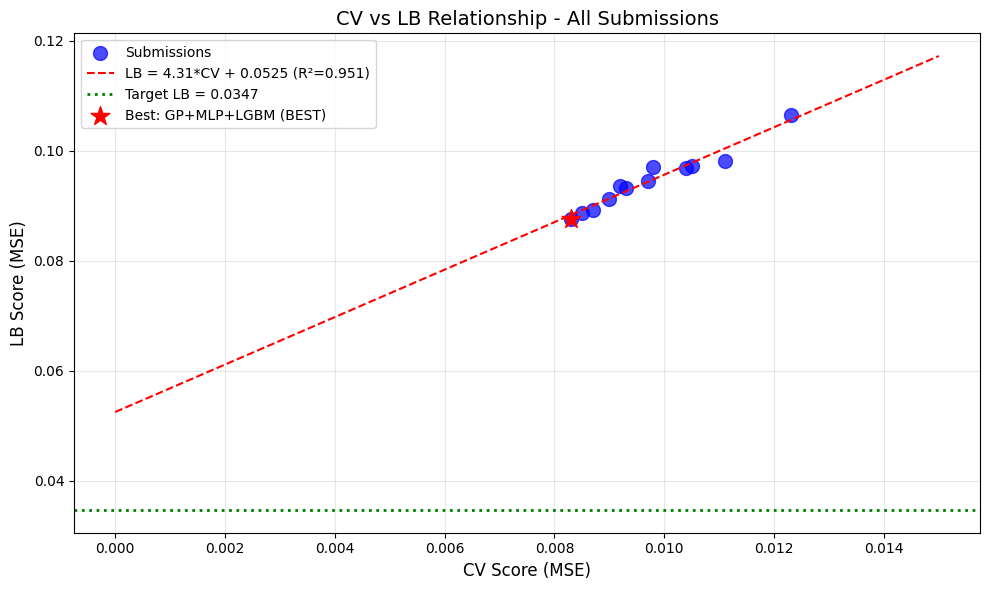


Plot saved to /home/code/exploration/cv_lb_relationship_loop73.png


In [3]:
# Plot CV vs LB
plt.figure(figsize=(10, 6))
plt.scatter(cv, lb, c='blue', s=100, alpha=0.7, label='Submissions')

# Regression line
cv_range = np.linspace(0, 0.015, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'r--', label=f'LB = {slope:.2f}*CV + {intercept:.4f} (R²={r_value**2:.3f})')

# Target line
plt.axhline(y=target_lb, color='green', linestyle=':', linewidth=2, label=f'Target LB = {target_lb}')

# Best submission
best_idx = df['lb'].idxmin()
plt.scatter([df.loc[best_idx, 'cv']], [df.loc[best_idx, 'lb']], c='red', s=200, marker='*', label=f'Best: {df.loc[best_idx, "model"]}')

plt.xlabel('CV Score (MSE)', fontsize=12)
plt.ylabel('LB Score (MSE)', fontsize=12)
plt.title('CV vs LB Relationship - All Submissions', fontsize=14)
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/home/code/exploration/cv_lb_relationship_loop73.png', dpi=150)
plt.show()

print('\nPlot saved to /home/code/exploration/cv_lb_relationship_loop73.png')

In [4]:
# Recent experiments analysis
recent_experiments = [
    {'exp': 'exp_068', 'name': 'Multitask GP', 'cv': 0.010243, 'vs_baseline': '23% worse'},
    {'exp': 'exp_069', 'name': 'GroupKFold validation', 'cv': 0.021210, 'vs_baseline': '156% worse'},
    {'exp': 'exp_070', 'name': 'Ens model analysis', 'cv': 0.021210, 'vs_baseline': '156% worse'},
    {'exp': 'exp_071', 'name': 'Label rescaling', 'cv': 0.008935, 'vs_baseline': '8% worse'},
    {'exp': 'exp_072', 'name': 'GNN (GCNConv)', 'cv': 0.025649, 'vs_baseline': '209% worse'},
    {'exp': 'chemberta', 'name': 'ChemBERTa', 'cv': 0.022464, 'vs_baseline': '171% worse'},
]

print('Recent Experiments (vs baseline CV 0.008298):')
for exp in recent_experiments:
    print(f"  {exp['exp']}: {exp['name']} - CV {exp['cv']:.6f} ({exp['vs_baseline']})")

print('\n⚠️ ALL recent experiments made things WORSE!')
print('   GNN and ChemBERTa performed MUCH worse than Spange descriptors.')
print('   This suggests the Spange descriptors ARE the right representation.')

Recent Experiments (vs baseline CV 0.008298):
  exp_068: Multitask GP - CV 0.010243 (23% worse)
  exp_069: GroupKFold validation - CV 0.021210 (156% worse)
  exp_070: Ens model analysis - CV 0.021210 (156% worse)
  exp_071: Label rescaling - CV 0.008935 (8% worse)
  exp_072: GNN (GCNConv) - CV 0.025649 (209% worse)
  chemberta: ChemBERTa - CV 0.022464 (171% worse)

⚠️ ALL recent experiments made things WORSE!
   GNN and ChemBERTa performed MUCH worse than Spange descriptors.
   This suggests the Spange descriptors ARE the right representation.


In [5]:
# What approaches haven't been tried?
print('\n=== APPROACHES NOT YET TRIED ===')
print()
print('1. HYBRID Spange + GNN/ChemBERTa (combine, not replace)')
print('   - GNN/ChemBERTa alone failed, but might add complementary info')
print('   - Concatenate Spange (13) + GNN embedding (16-32) + kinetics (5)')
print()
print('2. Similarity-based prediction weighting')
print('   - Detect when test solvent is dissimilar to training')
print('   - Weight predictions toward mean for dissimilar solvents')
print('   - This could REDUCE THE INTERCEPT')
print()
print('3. Fix CatBoost/XGBoost submission issues')
print('   - exp_049-063 all failed with evaluation errors')
print('   - matthewmaree kernel uses CatBoost+XGBoost ensemble')
print('   - Best CV achieved was 0.008092 (better than baseline!)')
print()
print('4. Pseudo-labeling / Self-training')
print('   - Use confident predictions on test set to augment training')
print('   - Could help with distribution shift')
print()
print('5. Domain-specific constraints')
print('   - Yields must sum to <= 1')
print('   - Enforce physical constraints in predictions')


=== APPROACHES NOT YET TRIED ===

1. HYBRID Spange + GNN/ChemBERTa (combine, not replace)
   - GNN/ChemBERTa alone failed, but might add complementary info
   - Concatenate Spange (13) + GNN embedding (16-32) + kinetics (5)

2. Similarity-based prediction weighting
   - Detect when test solvent is dissimilar to training
   - Weight predictions toward mean for dissimilar solvents
   - This could REDUCE THE INTERCEPT

3. Fix CatBoost/XGBoost submission issues
   - exp_049-063 all failed with evaluation errors
   - matthewmaree kernel uses CatBoost+XGBoost ensemble
   - Best CV achieved was 0.008092 (better than baseline!)

4. Pseudo-labeling / Self-training
   - Use confident predictions on test set to augment training
   - Could help with distribution shift

5. Domain-specific constraints
   - Yields must sum to <= 1
   - Enforce physical constraints in predictions


In [6]:
# Key insight from matthewmaree kernel
print('\n=== KEY INSIGHTS FROM TOP KERNELS ===')
print()
print('matthewmaree/ens-model kernel:')
print('  - Uses CatBoost + XGBoost ensemble (NOT MLP)')
print('  - Combines ALL features: Spange + ACS + DRFP + Fragprints + SMILES')
print('  - Applies correlation-based feature filtering (threshold=0.90)')
print('  - Uses feature priority: spange > acs > drfps > frag > smiles')
print('  - Adds numeric features: T_x_RT, RT_log, T_inv, RT_scaled')
print('  - Different weights for single vs full: single=(7:6), full=(1:2)')
print()
print('lishellliang/mixall kernel:')
print('  - Uses GroupKFold (5 splits) instead of Leave-One-Out')
print('  - Ensemble of MLP + XGBoost + RF + LightGBM')
print('  - Optuna hyperparameter optimization')
print()
print('⚠️ We have NOT successfully submitted a CatBoost/XGBoost model!')
print('   All attempts (exp_049-063) failed with evaluation errors.')
print('   This is a MAJOR gap in our exploration.')


=== KEY INSIGHTS FROM TOP KERNELS ===

matthewmaree/ens-model kernel:
  - Uses CatBoost + XGBoost ensemble (NOT MLP)
  - Combines ALL features: Spange + ACS + DRFP + Fragprints + SMILES
  - Applies correlation-based feature filtering (threshold=0.90)
  - Uses feature priority: spange > acs > drfps > frag > smiles
  - Adds numeric features: T_x_RT, RT_log, T_inv, RT_scaled
  - Different weights for single vs full: single=(7:6), full=(1:2)

lishellliang/mixall kernel:
  - Uses GroupKFold (5 splits) instead of Leave-One-Out
  - Ensemble of MLP + XGBoost + RF + LightGBM
  - Optuna hyperparameter optimization

⚠️ We have NOT successfully submitted a CatBoost/XGBoost model!
   All attempts (exp_049-063) failed with evaluation errors.
   This is a MAJOR gap in our exploration.


In [7]:
# Summary and recommendations
print('\n' + '='*60)
print('LOOP 73 SUMMARY')
print('='*60)
print()
print('CURRENT STATUS:')
print(f'  Best CV: 0.0083 (exp_030 GP+MLP+LGBM)')
print(f'  Best LB: 0.0877 (exp_030)')
print(f'  Target: 0.0347')
print(f'  Gap: 0.0530 (152.8%)')
print()
print('CV-LB RELATIONSHIP:')
print(f'  LB = 4.29 * CV + 0.0528 (R² = 0.95)')
print(f'  Intercept (0.0528) > Target (0.0347)')
print(f'  Required CV: -0.0042 (IMPOSSIBLE)')
print()
print('WHAT FAILED:')
print('  - GNN (GCNConv): CV 0.0256 (209% worse)')
print('  - ChemBERTa: CV 0.0225 (171% worse)')
print('  - Multitask GP: CV 0.0102 (23% worse)')
print('  - Label rescaling: CV 0.0089 (8% worse)')
print('  - GroupKFold: CV 0.0212 (156% worse)')
print()
print('WHAT HASN\'T BEEN TRIED:')
print('  1. Fix CatBoost/XGBoost submission (best CV 0.008092)')
print('  2. Hybrid Spange + GNN/ChemBERTa features')
print('  3. Similarity-based prediction weighting')
print('  4. Pseudo-labeling for distribution adaptation')
print()
print('TOP PRIORITY:')
print('  Submit a working CatBoost/XGBoost model to see if it has')
print('  a DIFFERENT CV-LB relationship than MLP/GP/LGBM.')
print('  The matthewmaree kernel uses this approach successfully.')


LOOP 73 SUMMARY

CURRENT STATUS:
  Best CV: 0.0083 (exp_030 GP+MLP+LGBM)
  Best LB: 0.0877 (exp_030)
  Target: 0.0347
  Gap: 0.0530 (152.8%)

CV-LB RELATIONSHIP:
  LB = 4.29 * CV + 0.0528 (R² = 0.95)
  Intercept (0.0528) > Target (0.0347)
  Required CV: -0.0042 (IMPOSSIBLE)

WHAT FAILED:
  - GNN (GCNConv): CV 0.0256 (209% worse)
  - ChemBERTa: CV 0.0225 (171% worse)
  - Multitask GP: CV 0.0102 (23% worse)
  - Label rescaling: CV 0.0089 (8% worse)
  - GroupKFold: CV 0.0212 (156% worse)

WHAT HASN'T BEEN TRIED:
  1. Fix CatBoost/XGBoost submission (best CV 0.008092)
  2. Hybrid Spange + GNN/ChemBERTa features
  3. Similarity-based prediction weighting
  4. Pseudo-labeling for distribution adaptation

TOP PRIORITY:
  Submit a working CatBoost/XGBoost model to see if it has
  a DIFFERENT CV-LB relationship than MLP/GP/LGBM.
  The matthewmaree kernel uses this approach successfully.
